---
### Minería de Datos (Máster en Ciencia de Datos)
# Práctica: Árboles de Regresión
### Rodrigo Manzanas, Ana Casanueva  
#### Departamento de Matemática Aplicada y Ciencias de la Computación (Universidad de Cantabria)
---

En esta práctica trabajaremos con el dataset `Boston`, del paquete `MASS`. Nuestra variable objetivo será `medv` (valor de la vivienda en los suburbios de esta ciudad, en miles de dólares). Las 13 variables restantes, que dan cuenta de diversos aspectos socioeconómicos y estructurales, serán nuestros predictores. Utilizaremos en todo momento árboles de regresión de tipo CART, que entrenaremos con los paquetes `tree`, `rpart` y `caret`.

En primer lugar, dividiremos el dataset en dos subconjuntos independientes, uno para train (75% de los datos) y otro para test (25% restante), escogidos aleatoriamente.

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

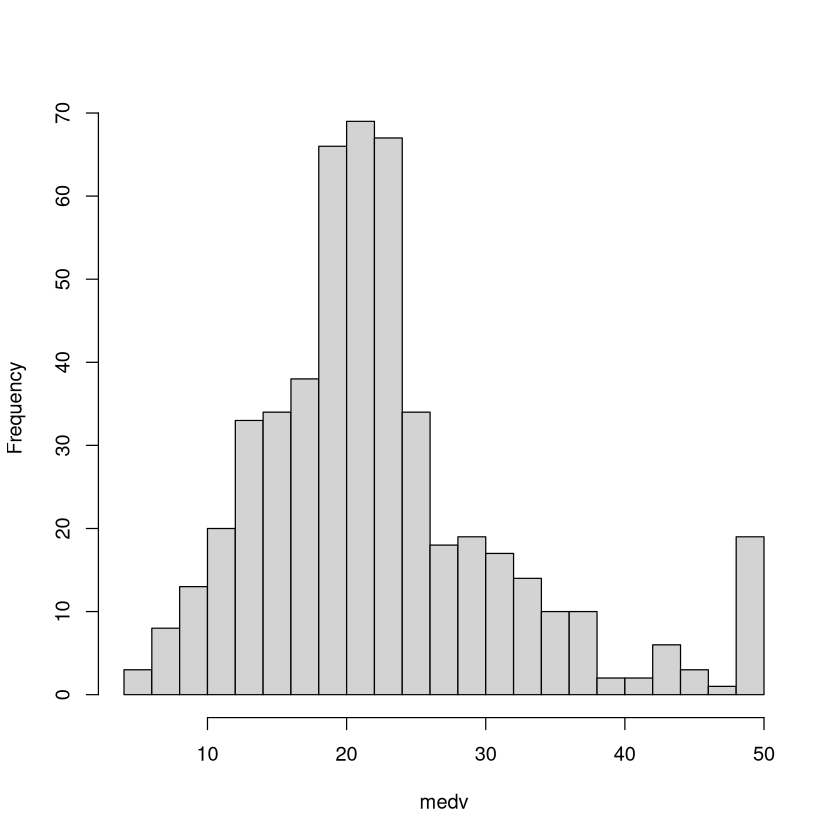

In [1]:
library(MASS)

## explore dataset
str(Boston)
summary(Boston)
hist(Boston$medv, 20, xlab = "medv", main = "")


## train/test partition
set.seed(5)  # for reproducibility
n = nrow(Boston)
indtrain = sample(1:n, round(0.75*n))
indtest = setdiff(1:n, indtrain)

## `tree`

**Ejercicio:** Comienza ajustando un árbol de regresión con los parámetros por defecto de la función `tree` (paquete `tree`), en el dataset de train. ¿Cuántas hojas tiene este árbol?

In [2]:
library(tree)
t.default = tree(medv ~ ., Boston, subset = indtrain)
summary(t.default)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = indtrain)
Variables actually used in tree construction:
[1] "rm"      "lstat"   "dis"     "nox"     "ptratio"
Number of terminal nodes:  10 
Residual mean deviance:  14.97 = 5538 / 370 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-23.5800  -2.1720   0.1781   0.0000   2.1730  15.5800 

La salida de `summary()` resulta de utilidad para entender el modelo:

 * `Number of terminal nodes`: Número de hojas (nodos terminales) del árbol resultante. Da una idea de su _complejidad_.
 * `Residual mean deviance` ($RMD$): _Desviación residual total_ dividida por el número de datos utilizados en el ajuste ($n$). Ten en cuenta que la desviación residual total ($TRD$) es la suma de cuadrados de los residuos:

$$TRD = \sum_{i=1}^n(\hat{y_i}-y_i)^2\Rightarrow RMD = \frac{1}{n}\sum_{i=1}^n(\hat{y_i}-y_i)^2$$

**Nota**: Como ya sabes, en el caso de árboles de clasificación aparecerá el término `Misclassification error rate`, o _tasa de error de clasificación_ (número de observaciones mal clasificadas dividido entre el total) en lugar de la $RMD$. 

Los objetos devueltos por la función `tree` cuentan con su propio método `plot()`, al que es necesario añadir las etiquetas en un segundo paso con `text()`:

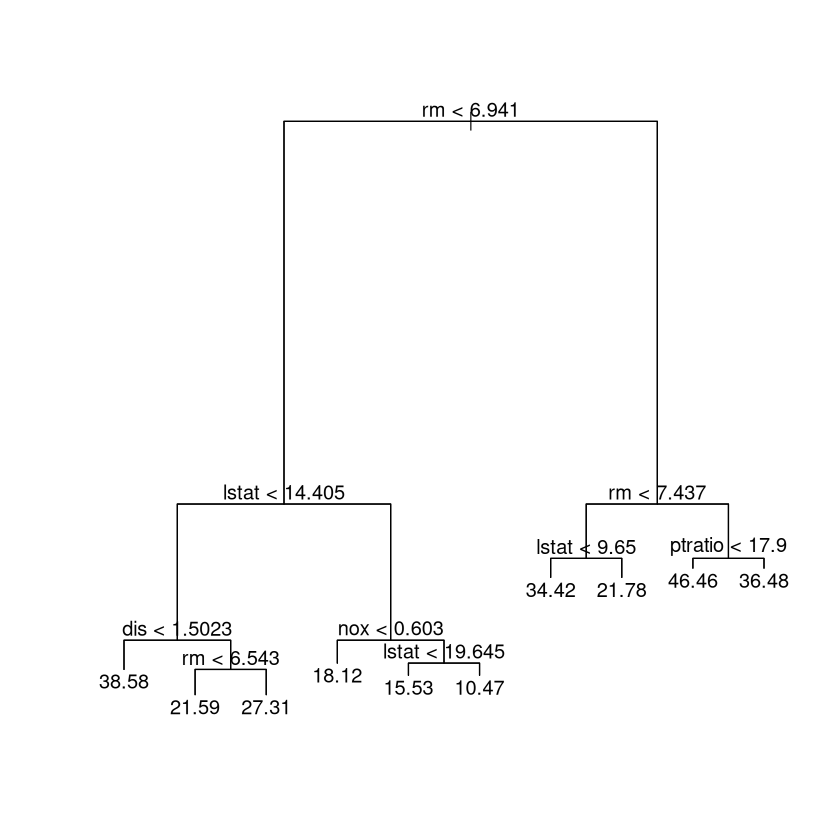

In [3]:
plot(t.default)
text(t.default)

Como se observa, la variable `rm` (número medio de dependencias por vivienda) es la más importante a la hora de establecer la primera división. Otra variable relevante es `lstat`, la cual mide el porcentaje de habitantes con un nivel socio-económico bajo en el área.

La estructura del árbol puede explorarse observando la salida por pantalla del propio objeto, aunque esto sólo va a resultar útil para árboles pequeños como el de este ejemplo:

In [4]:
print(t.default)

node), split, n, deviance, yval
      * denotes terminal node

 1) root 380 34060.0 22.56  
   2) rm < 6.941 321 13320.0 19.80  
     4) lstat < 14.405 190  4972.0 23.27  
       8) dis < 1.5023 5  1061.0 38.58 *
       9) dis > 1.5023 185  2708.0 22.86  
        18) rm < 6.543 144  1183.0 21.59 *
        19) rm > 6.543 41   482.7 27.31 *
     5) lstat > 14.405 131  2723.0 14.76  
      10) nox < 0.603 51   611.0 18.12 *
      11) nox > 0.603 80  1169.0 12.62  
        22) lstat < 19.645 34   245.6 15.53 *
        23) lstat > 19.645 46   421.6 10.47 *
   3) rm > 6.941 59  4962.0 37.60  
     6) rm < 7.437 33  1691.0 32.12  
      12) lstat < 9.65 27   541.9 34.42 *
      13) lstat > 9.65 6   364.8 21.78 *
     7) rm > 7.437 26  1028.0 44.54  
      14) ptratio < 17.9 21   313.2 46.46 *
      15) ptratio > 17.9 5   312.7 36.48 *


Estos valores son:

* `node`: Un número identificativo para cada nodo en el árbol.
* `split`: La regla de decisión utilizada para crear una división.
* `n`: el número de observaciones que cumplen el criterio de escisión (es decir, que se van a la rama izquierda).
* `deviance`: La desviación en esa rama (RMD calculado con la `n` anterior).
* `yval`: Valor predicho en ese nodo (valor medio de todas las observaciones que caen en el nodo en cuestión).
* `*`: Indica que el nodo en cuestión es terminal (_hoja_).

## `rpart`

También se pueden ajustar árboles de decisión con la función `rpart` (paquete `rpart`). La ventaja de `rpart` frente a `tree` es que el primero devuelve un objeto que puede visualizarse utilizando las funciones de la librería `rpart.plot`, que proporciona una amplia variedad de opciones gráficas (se recomienda revisar la ayuda de la función `prp` para tener una idea general de las mismas).

**Ejercicio:** En esta ocasión, ajusta un árbol de regresión con los parámetros por defecto de la función `rpart`, en el dataset de train. ¿Cuántas hojas tiene? ¿Es igual al que obtuviste con `tree`?

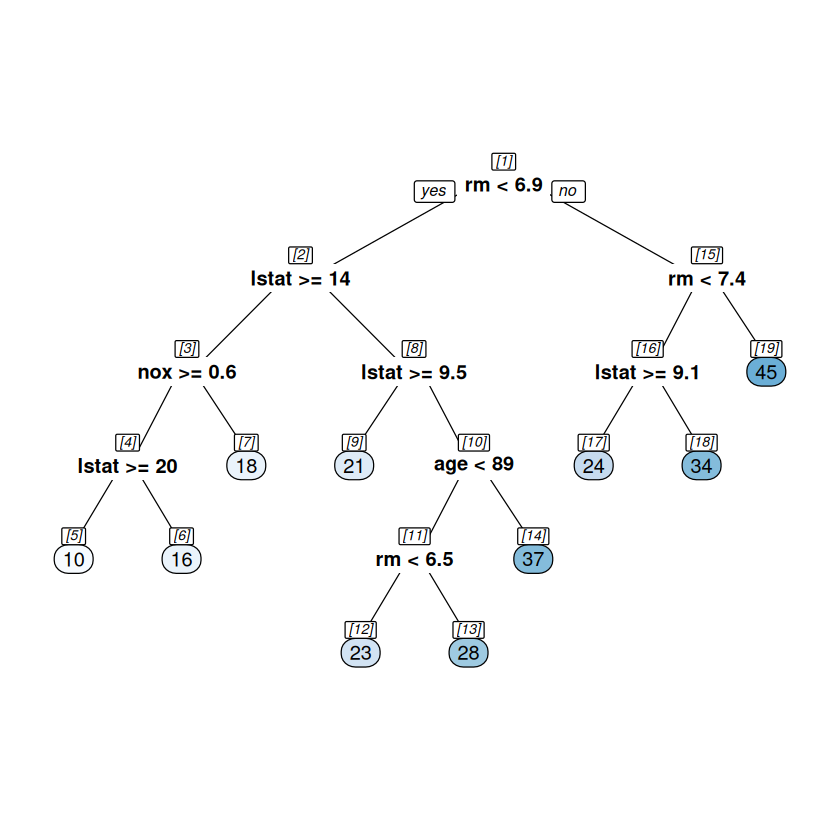

In [5]:
library(rpart)

## default tree with rpart
t.default.rpart = rpart(medv ~ ., Boston, subset = indtrain)
#summary(t.default.rpart)

library(rpart.plot)
prp(t.default.rpart, box.palette = "auto", ni = TRUE)

## Pre-poda

Como se ha indicado en la teoría, los árboles de decisión son proclives al sobreajuste si no se limita de algún modo su tamaño; es decir, si no se *podan* adecuadamente. La función `tree.control` permite jugar con distintos parámetros que controlan el crecimiento del árbol (se trataría por tanto de una pre-proda). Estos parámetros son `minsize`, `mincut` y `mindev`. A continuación analizaremos cuál es el efecto de cada uno de ellos sobre la complejidad del árbol resultante (en términos del número de hojas) y la varianza residual.

`minsize` controla el número mínimo de datos que ha de tener un cierto nodo para que pueda dividirse. El valor por defecto es 10. 

**Ejercicio:**  
Realiza dos gráficos, el primero para ver cómo varía el número de hojas con el valor del parámetro minsize, y el segundo para ver cómo varía la RSS con el valor del parámetro minsize. Prueba, en el dataset de train, los siguientes valores para minsize: {50, 49, 48, ..., 2}.

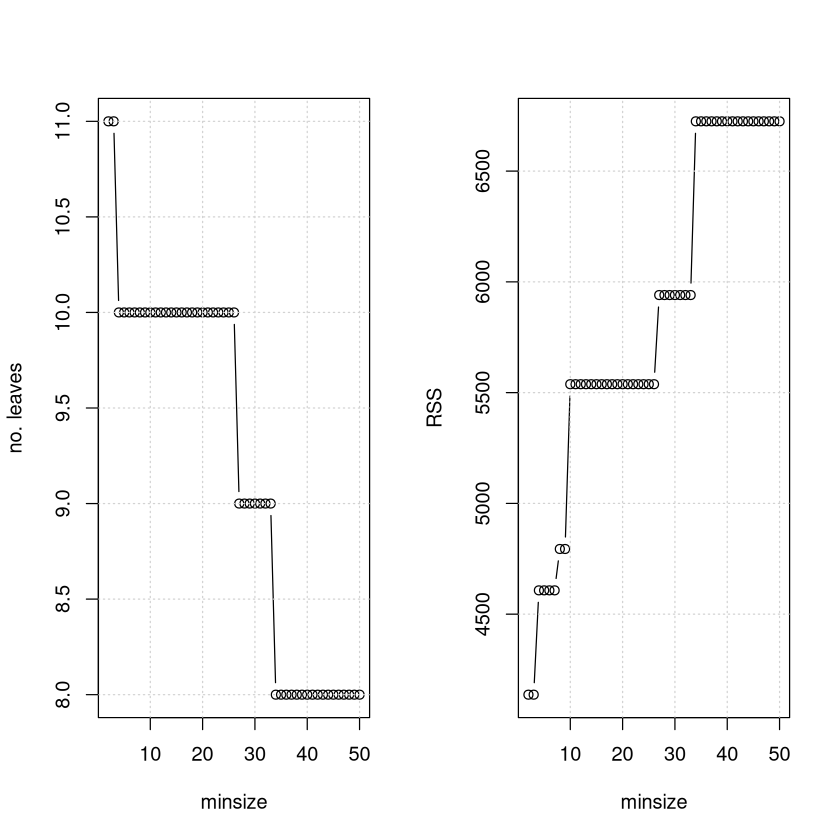

In [6]:
## sensitivity to minsize
minsize = seq(50, 2, -1)
size = rep(NA, length(minsize))
dev = rep(NA, length(minsize))
for (i in minsize) {
    t = tree(medv ~ ., data = Boston, subset = indtrain, minsize = i)
    size[which(minsize == i)] = summary(t)$size
    dev[which(minsize == i)] = summary(t)$dev
}
par(mfrow = c(1, 2))
plot(minsize, size, type = "b", xlab = "minsize", ylab = "no. leaves"); grid()
plot(minsize, dev, type = "b", xlab = "minsize", ylab = "RSS"); grid()

`mincut` está directamente relacionado con `minsize`, pero es ligeramente distinto. `mincut` tiene que ver con el número de datos que caerían en cada uno de los dos nodos hijos que se crearían al dividirse su nodo padre. En concreto, aunque el nodo padre esté por encima de la restricción impuesta por `minsize`, si su división diese lugar a algún hijo con un número de datos por debajo de `mincut`, dicha división no se produce.

**Ejercicio:**  
Realiza dos gráficos, el primero para ver cómo varía el número de hojas con el valor del parámetro mincut, y el segundo para ver cómo varía la RSS con el valor del parámetro mincut. Prueba, en el dataset de train, los siguientes valores para mincut: {50, 49, 48, ..., 1}.

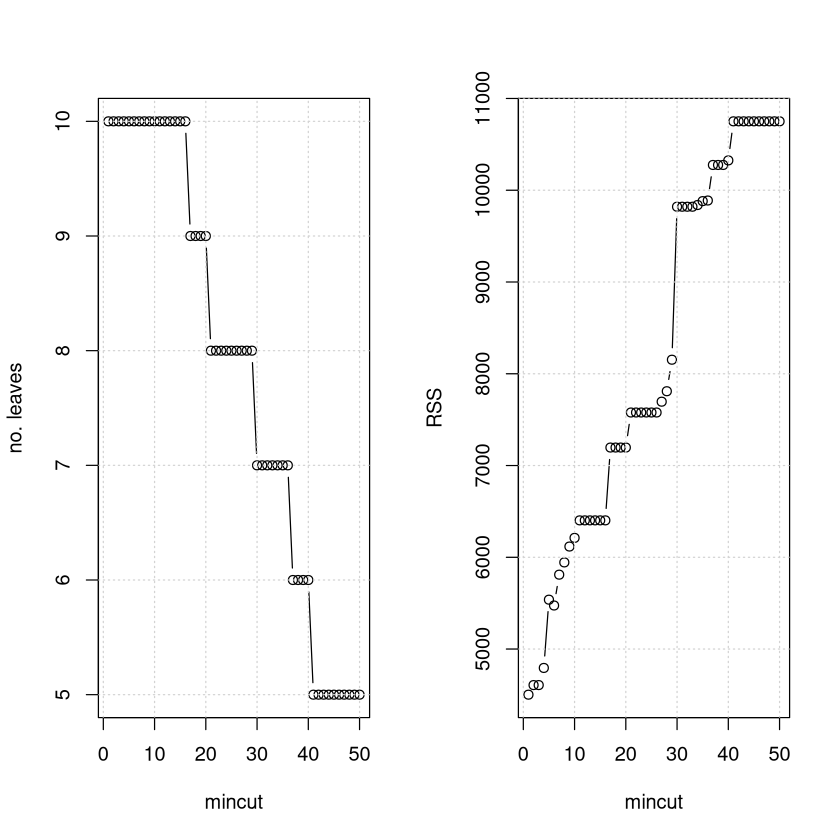

In [7]:
## sensitivity to mincut
mincut = seq(50, 1, -1)
size = rep(NA, length(mincut))
dev = rep(NA, length(mincut))
for (i in mincut) {
    t = tree(medv ~ ., data = Boston, subset = indtrain, mincut = i)
    size[which(mincut == i)] = summary(t)$size
    dev[which(mincut == i)] = summary(t)$dev  
}
par(mfrow = c(1, 2))
plot(mincut, size, type = "b", xlab = "mincut", ylab = "no. leaves"); grid()
plot(mincut, dev, type = "b", xlab = "mincut", ylab = "RSS"); grid()

Finalmente, `mindev` permite especificar la fracción sobre la desviación global de los datos (es decir, la del nodo raíz) que debe alcanzarse, como mínimo, para poder realizar una nueva división. 

**Ejercicio:**  
Realiza dos gráficos, el primero para ver cómo varía el número de hojas con el valor del parámetro mindev, y el segundo para ver cómo varía la RSS con el valor del parámetro mindev. Prueba, en el dataset de train, los siguientes valores para mindev: {1, 0.99, 0.98, ..., 0}.

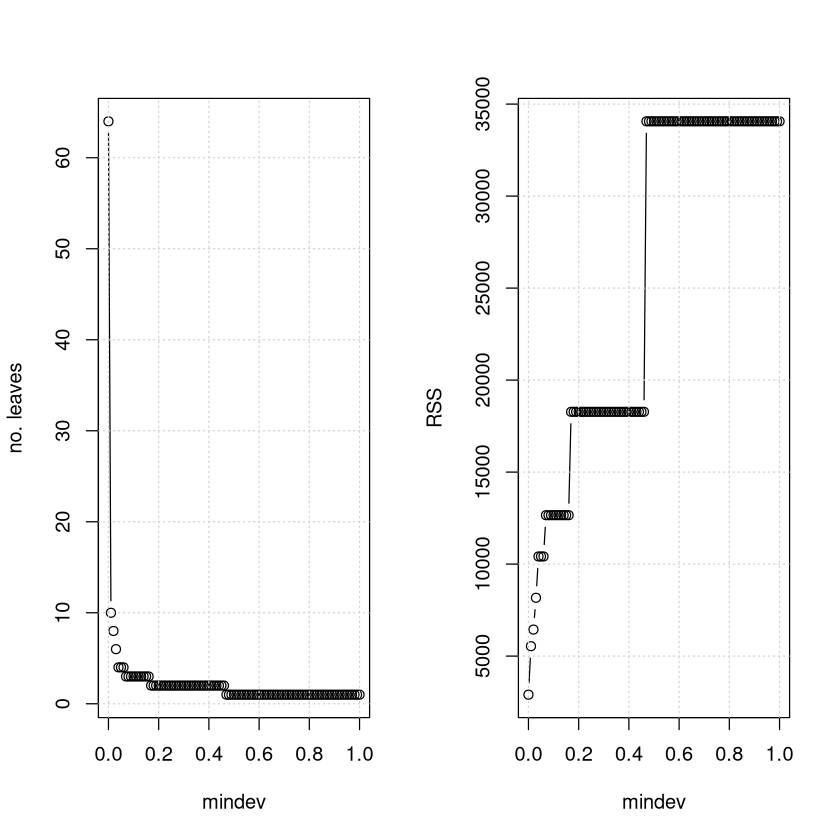

In [8]:
## sensitivity to mindev
mindev = seq(1, 0, -0.01)
size = rep(NA, length(mindev))
dev = rep(NA, length(mindev))
for (i in mindev) {
    t = tree(medv ~ ., data = Boston, subset = indtrain, mindev = i)
    size[which(mindev == i)] = summary(t)$size
    dev[which(mindev == i)] = summary(t)$dev 
}
par(mfrow = c(1, 2))
plot(mindev, size, type = "b", xlab = "mindev", ylab = "no. leaves"); grid()
plot(mindev, dev, type = "b", xlab = "mindev", ylab = "RSS"); grid()

## Post-poda

La post-poda consiste en permitir el desarrollo del árbol sin limitaciones (esto implica un sobreajuste), para posteriormente eliminar los nodos que aportan menos información. Esta estrategia es muy común en la creación de árboles de decisión en general, y de regresión en particular.

En éstos últimos, esta post-poda está guiada por una métrica que refleja un compromiso entre la complejidad del árbol y su ajuste a los datos, el $Tree\_Score$, la cual se trata de minimizar. $Tree\_Score = RSS +\alpha L$, siendo $L$ el número de nodos terminales (hojas) y $\alpha$ el parámetro que controla la penalización impuesta de acuerdo a la complejidad. $RSS$ es la suma total de los cuadrados de los residuos (_residual sum of squares_), de modo que:

$$
\text{Tree Score} = \sum_{l=1}^L\sum_{i\in R_l}(y_i-\hat{y}_{R_l})^2+\alpha L
$$

Así, para $\alpha = 0$ no se penaliza la complejidad en absoluto, dando lugar al árbol más complejo posible (es decir, el que se obtendría fijándose únicamente en la minimización del RSS). Por el contrario, valores demasiado altos de $\alpha$ pueden dar lugar a árboles muy simples al penalizar excesivamente nuevas particiones. 

**Ejercicio:** A continuación, analiza el efecto del parámetro $\alpha$. Para ello, construye primero el árbol completo (es decir, al que le dejamos crecer sin aplicar ninguna restricción hasta lograr una predicción _quasi_ perfecta en el train, que estará claramente sobreajustado). A continuación, poda este árbol con la función `prune.tree`, aplicando los valores 0, 500, 1000, 2500 y 10000 para el parámetro _cost-complexity_. Calcula, para cada uno de estos valores, el _Tree Score_ asociado y dibuja el correspondiente árbol.

In [9]:
## complete (i.e. fully grown) tree
t.full = tree(medv ~ ., data = Boston, subset = indtrain, 
              minsize = 2, mincut = 1, mindev = 0)
summary(t.full)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = indtrain, minsize = 2, 
    mincut = 1, mindev = 0)
Variables actually used in tree construction:
 [1] "rm"      "lstat"   "dis"     "crim"    "rad"     "zn"      "ptratio"
 [8] "black"   "nox"     "tax"     "indus"   "age"    
Number of terminal nodes:  304 
Residual mean deviance:  0.009342 = 0.71 / 76 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1333  0.0000  0.0000  0.0000  0.0000  0.1333 

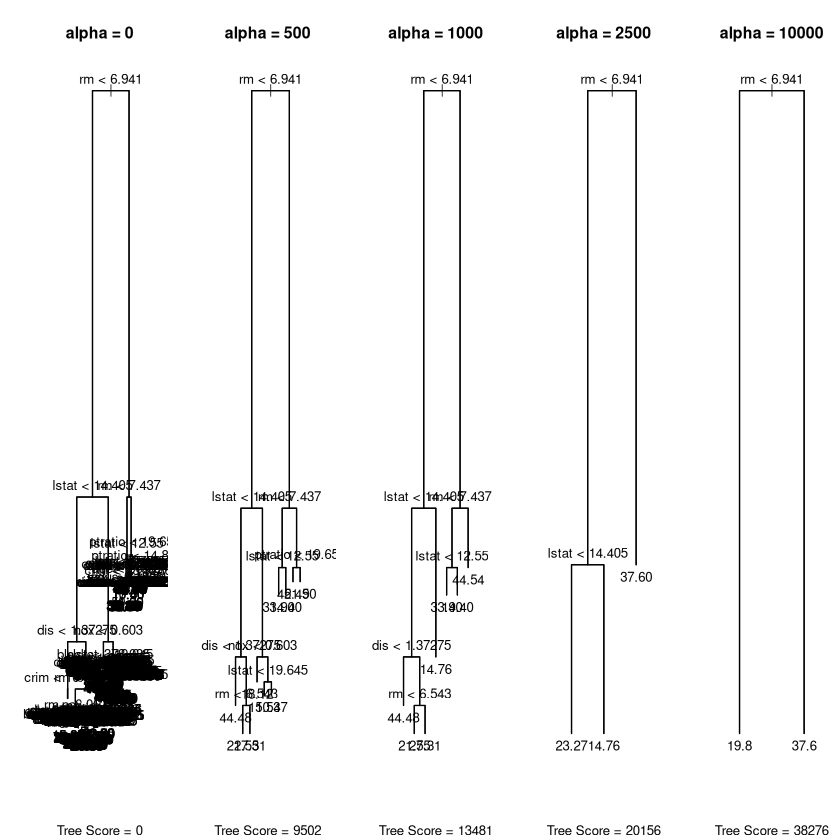

In [10]:
## sensitivity to the cost-complexity parameter
alpha = c(0, 500, 1000, 2500, 10000)
par(mfrow = c(1, length(alpha)))
for (i in 1:length(alpha)) {
  k = alpha[i]
  # k is the cost-complexity parameter in 'prune.tree'
  t.pruned.k = prune.tree(t.full, k = alpha[i])
  plot(t.pruned.k)
  text(t.pruned.k)
  # Residual Sum of Squares (RSS)
  RSS = summary(t.pruned.k)$dev
  # number of leaves
  n = summary(t.pruned.k)$size
  
  title(main = paste("alpha =", alpha[i]),
        sub = sprintf("Tree Score = %d", floor(RSS) + k*n))
}

Como puede verse, el incremento de $\alpha$ reduce progresivamente el número de hojas y aumenta el valor del $Tree\_Score$.

Para encontrar un valor de $\alpha$ óptimo se sigue una aproximación empírica basada en un procedimiento de validación cruzada. Como sabes, éste se encuentra implementado en el paquete `tree`, a través de la función `cv.tree`. Por defecto, se aplica un esquema de validación cruzada con 10 _folds_. El valor de $\alpha$ que produce los mejores resultados (en promedio para todos los _folds_), es el que resulta finalmente seleccionado. Veámoslo: <!--En este caso, el score seleccionado es el TRD (similar al _Tree score_ anteriormente descrito).-->

**Ejercicio:**  
Aplícale al árbol completo la función `cv.tree` para ver cómo varía la RSS con el número de hojas.

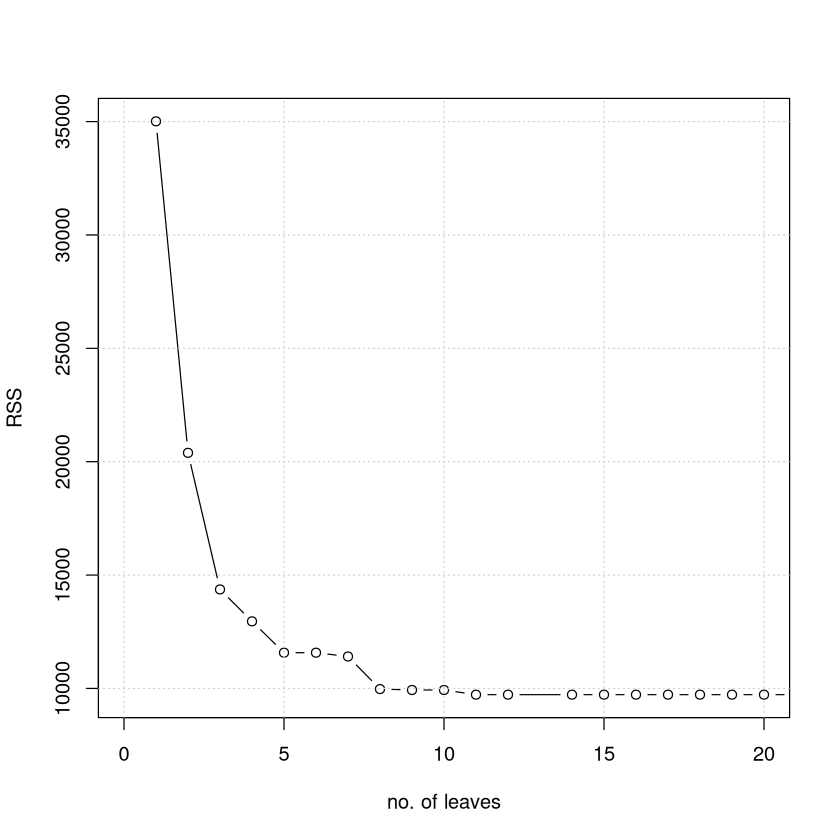

In [11]:
t.cv = cv.tree(t.full)
plot(t.cv$size, t.cv$dev, type = "b", xlim = c(0, 20),
     xlab = "no. of leaves", ylab = "RSS")
grid()

El gráfico anterior sugiere que un árbol de más de 8 hojas no mejora el RSS, por lo que aumentar su complejidad más allá de este valor no aporta nada. 

Podemos aplicar el método `plot` directamente sobre el objeto resultante de `cv.tree`:

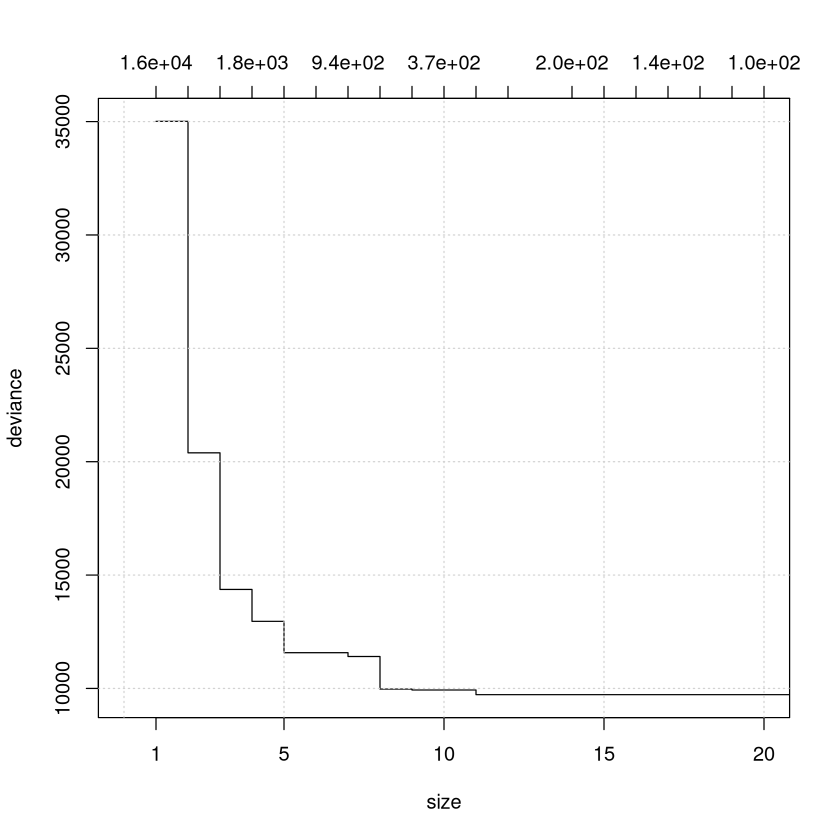

In [12]:
plot(t.cv, xlim = c(0, 20))
grid()

Este gráfico muestra esencialmente la misma información que el anterior, pero además añade un eje secundario en la parte superior que indica el parámetro _cost-complexity_ (`k`) aplicado en cada caso.

**Ejercicio:** 
En base a los análisis anteriores, quédate con un árbol de 8 hojas, que parece ser un tamaño óptimo. ¿Cuántos predictores entran en juego en el mismo?


Regression tree:
snip.tree(tree = t.full, nodes = c(13L, 10L, 19L, 18L, 12L, 8L, 
11L, 7L))
Variables actually used in tree construction:
[1] "rm"    "lstat" "dis"   "nox"  
Number of terminal nodes:  8 
Residual mean deviance:  14.89 = 5537 / 372 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-22.6400  -2.1720   0.2222   0.0000   2.2150  16.1000 

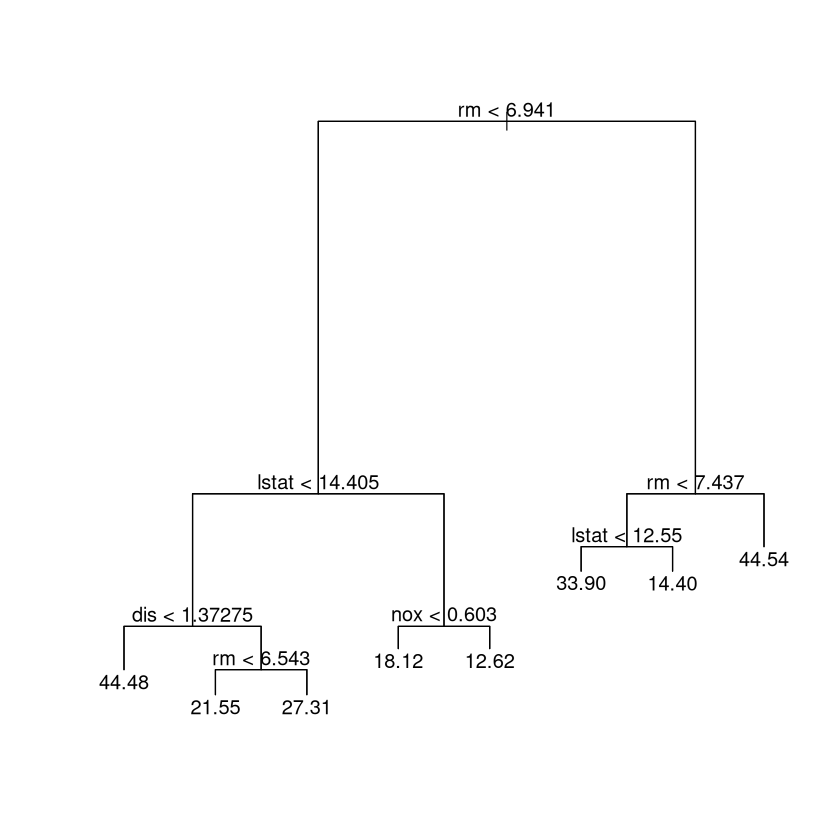

In [13]:
t.opt = prune.tree(t.full, best = 8)
summary(t.opt)
plot(t.opt)
text(t.opt)

**Ejercicio:** A continuación, realiza predicciones, tanto para el conjunto de train como para el de test, para el árbol que has obtenido por defecto, el completo y el _óptimo_ (este último con 8 hojas). Valida tus resultados en función del RMSE y del *ratio* de varianzas, y compáralas entre ellas. En todos los casos, haz un *scatter plot* en el que representes las predicciones frente a las observaciones. ¿Qué conclusiones obtienes? ¿Cuáles son las diferencias entre el árbol por defecto y el óptimo?

In [14]:
# auxiliary function to calculate the RMSE
rmse <- function(x, y) {
    sqrt(mean((x - y)^2))
}

[1] 3.817568 3.373373

[1] 0.8374176 0.8371927

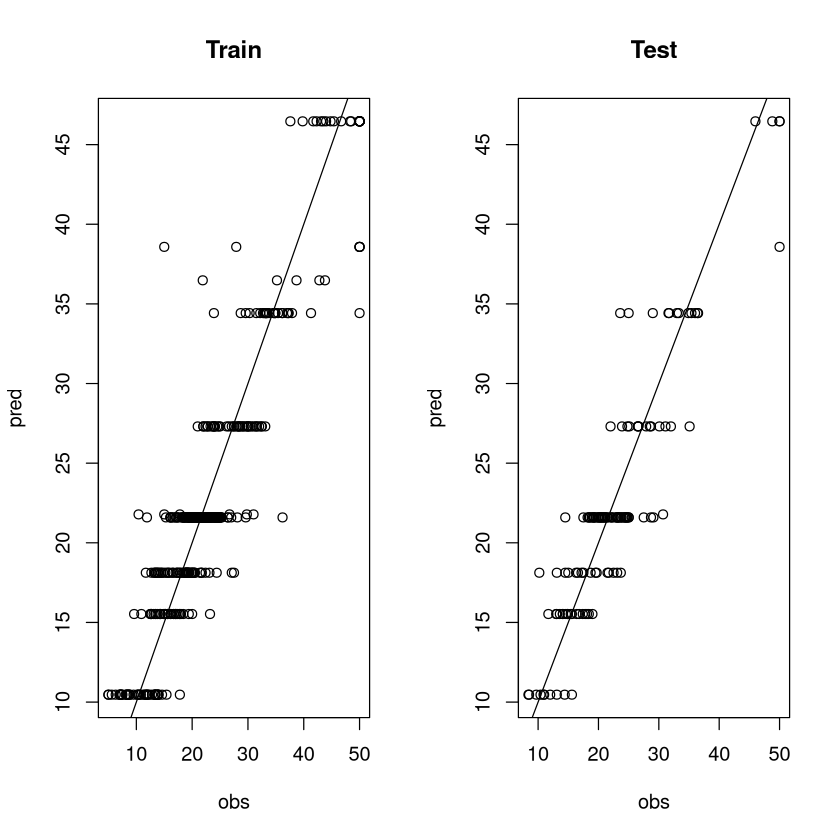

In [15]:
## default tree
pred.train.t.default = predict(t.default, newdata = Boston[indtrain, ])
pred.test.t.default = predict(t.default, newdata = Boston[indtest, ])

rmse.train.t.default = rmse(Boston[indtrain, ]$medv, pred.train.t.default)
rmse.test.t.default = rmse(Boston[indtest, ]$medv, pred.test.t.default)

c(rmse.train.t.default, rmse.test.t.default)
c(var(pred.train.t.default)/var(Boston[indtrain, ]$medv), 
  var(pred.test.t.default)/var(Boston[indtest, ]$medv))

par(mfrow = c(1, 2))
plot(Boston[indtrain, ]$medv, pred.train.t.default, 
     xlab = "obs", ylab = "pred", main = "Train")
abline(0,1)
plot(Boston[indtest, ]$medv, pred.test.t.default,
    xlab = "obs", ylab = "pred", main = "Test")
abline(0,1)

[1] 0.04322524 4.20844347

[1] 0.9999792 1.0412243

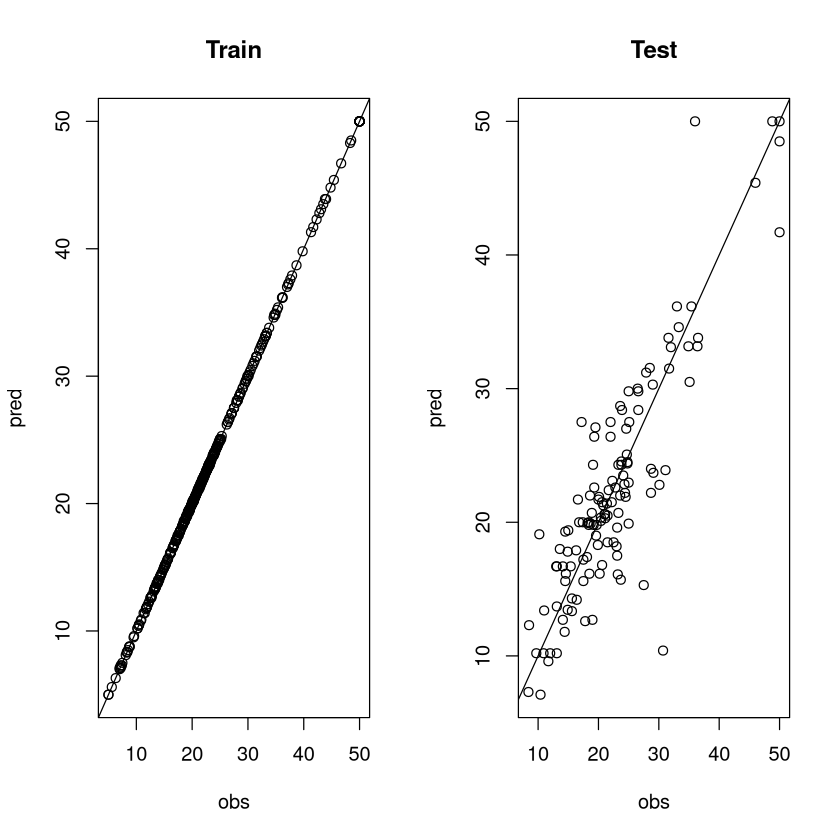

In [16]:
## complete (i.e. fully grown) tree
pred.train.t.full = predict(t.full, newdata = Boston[indtrain, ])
pred.test.t.full = predict(t.full, newdata = Boston[indtest, ])

rmse.train.t.full = rmse(Boston[indtrain, ]$medv, pred.train.t.full)
rmse.test.t.full = rmse(Boston[indtest, ]$medv, pred.test.t.full)

c(rmse.train.t.full, rmse.test.t.full)
c(var(pred.train.t.full)/var(Boston[indtrain, ]$medv), 
  var(pred.test.t.full)/var(Boston[indtest, ]$medv))

par(mfrow = c(1, 2))
plot(Boston[indtrain, ]$medv, pred.train.t.full, 
     xlab = "obs", ylab = "pred", main = "Train")
abline(0,1)
plot(Boston[indtest, ]$medv, pred.test.t.full,
    xlab = "obs", ylab = "pred", main = "Test")
abline(0,1)

[1] 3.817368 3.674136

[1] 0.8374346 0.8551798

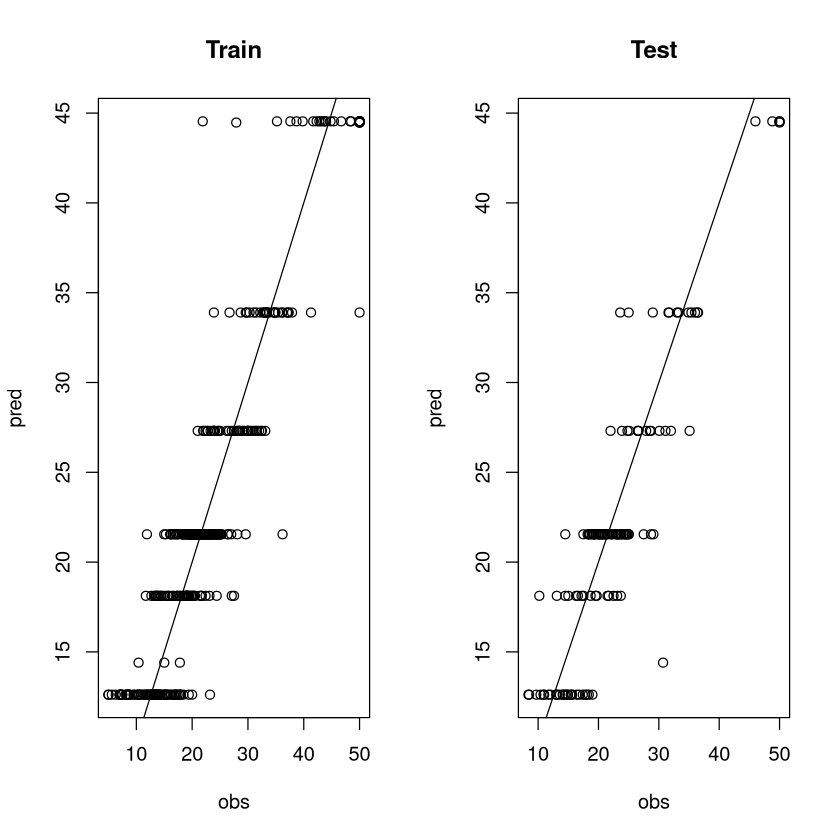

In [17]:
## optimum tree (8 leaves)
pred.train.t.opt = predict(t.opt, newdata = Boston[indtrain, ])
pred.test.t.opt = predict(t.opt, newdata = Boston[indtest, ])

rmse.train.t.opt = rmse(Boston[indtrain, ]$medv, pred.train.t.opt)
rmse.test.t.opt = rmse(Boston[indtest, ]$medv, pred.test.t.opt)

c(rmse.train.t.opt, rmse.test.t.opt)
c(var(pred.train.t.opt)/var(Boston[indtrain, ]$medv), 
  var(pred.test.t.opt)/var(Boston[indtest, ]$medv))


par(mfrow = c(1, 2))
plot(Boston[indtrain, ]$medv, pred.train.t.opt, 
     xlab = "obs", ylab = "pred", main = "Train")
abline(0,1)
plot(Boston[indtest, ]$medv, pred.test.t.opt,
    xlab = "obs", ylab = "pred", main = "Test")
abline(0,1)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = indtrain)
Variables actually used in tree construction:
[1] "rm"      "lstat"   "dis"     "nox"     "ptratio"
Number of terminal nodes:  10 
Residual mean deviance:  14.97 = 5538 / 370 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-23.5800  -2.1720   0.1781   0.0000   2.1730  15.5800 


Regression tree:
snip.tree(tree = t.full, nodes = c(13L, 10L, 19L, 18L, 12L, 8L, 
11L, 7L))
Variables actually used in tree construction:
[1] "rm"    "lstat" "dis"   "nox"  
Number of terminal nodes:  8 
Residual mean deviance:  14.89 = 5537 / 372 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-22.6400  -2.1720   0.2222   0.0000   2.2150  16.1000 

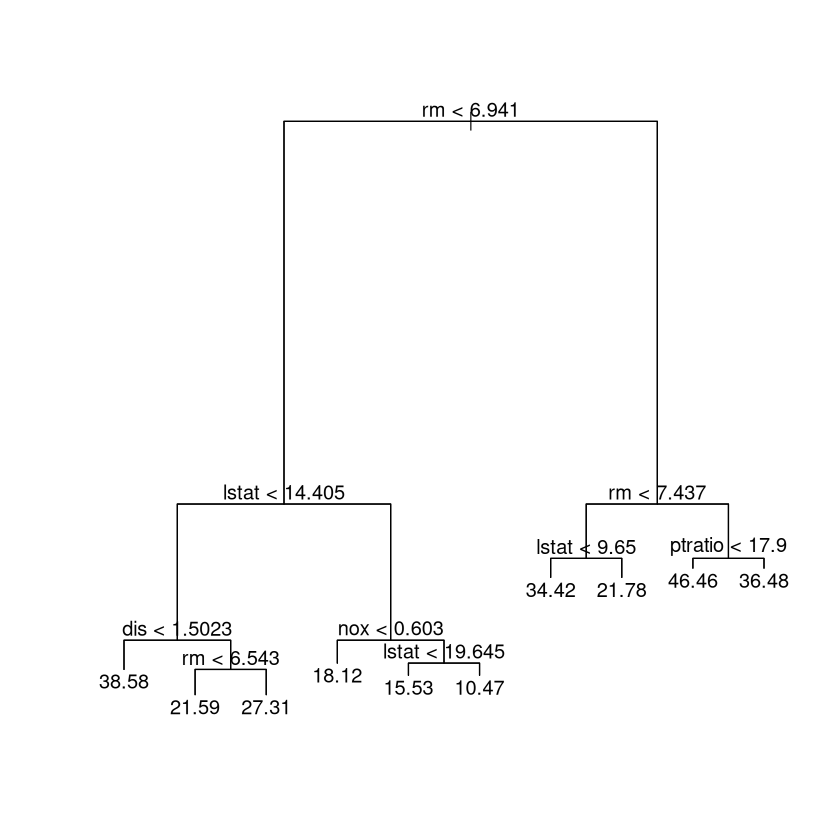

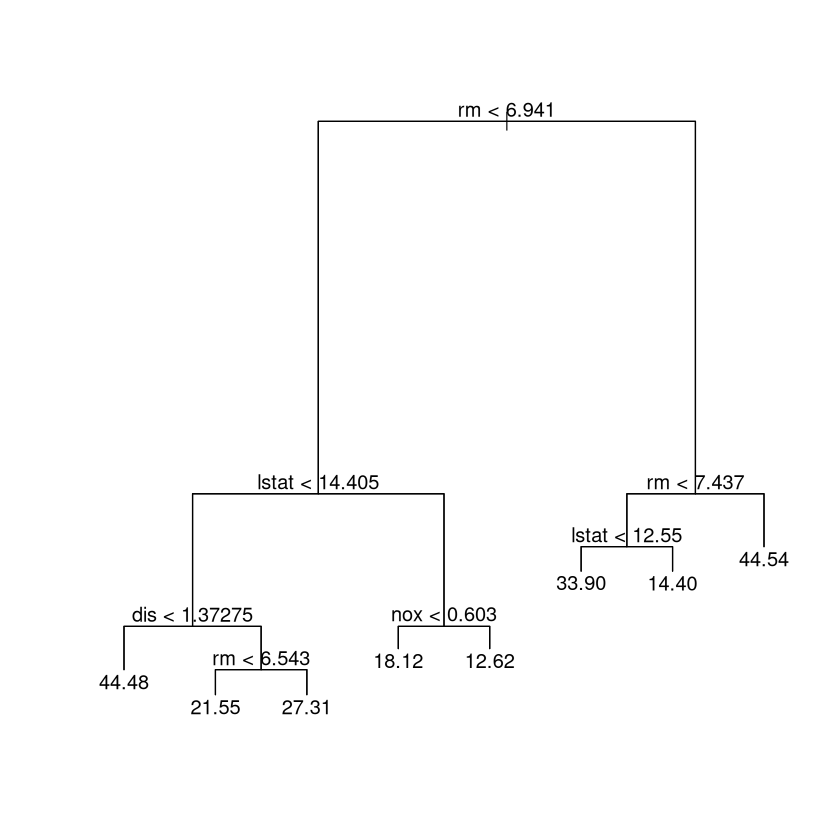

In [18]:
## differences between the default and optimum trees
summary(t.default)
summary(t.opt)

plot(t.default); text(t.default)
plot(t.opt); text(t.opt)

## `caret`

Hasta ahora hemos utilizado los paquetes `tree` y `rpart` para encontrar la configuración _óptima_ de nuestro árbol de regresión. A continuación veremos cómo utilizar el paquete `caret` para el mismo propósito. Emplearemos el método `rpart2`, que permite modificar el parámetro `maxdepth` (número de niveles de profundidad). Puesto que sabemos que los árboles de decisión son sensibles a la partición train/test escogida, realizaremos este ajuste en un marco de validación cruzada con 4 _folds_, que repetiremos 20 veces. Ten en cuenta que para los árboles de regresión, el error cometido se evalúa en función del RMSE.

In [19]:
library(caret)

## 4-fold CV, repeated 5 times
trctrl = trainControl(method = "repeatedcv", number = 4, repeats = 20)

Loading required package: ggplot2

Loading required package: lattice



**Ejercicio:** Barre valores para `maxdepth` entre 1 y 20. De acuerdo a este parámetro, ¿qué profundidad (en número de niveles verticales) resulta tener el árbol óptimo?

,maxdepth
,<int>
10,10


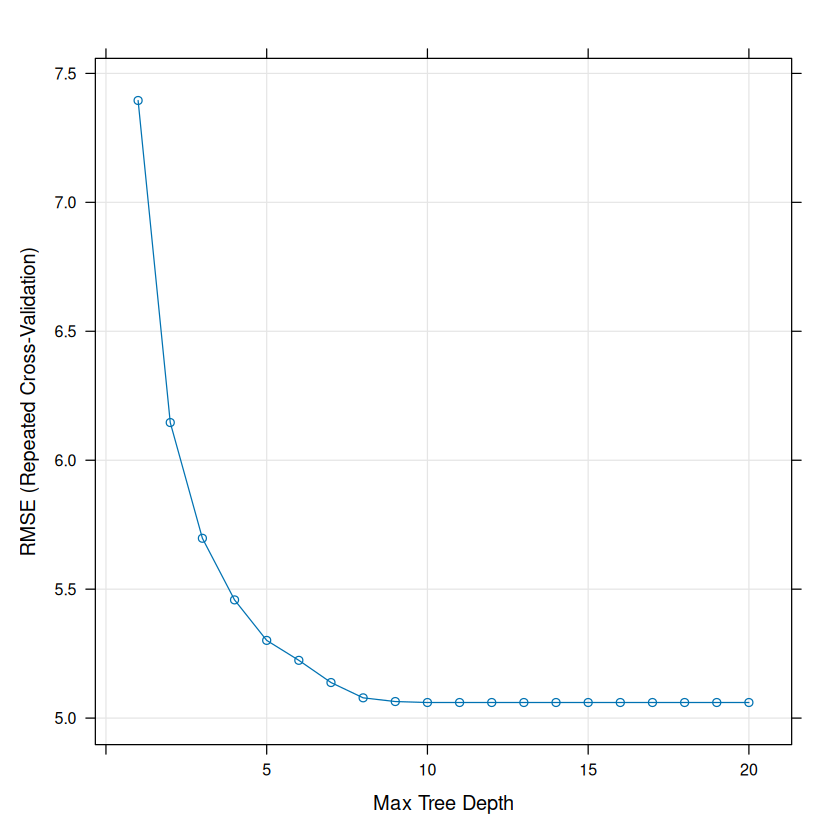

In [20]:
t.opt.md = train(medv ~. , Boston, subset = indtrain, 
                      method = "rpart2",
                      trControl = trctrl,
                      tuneGrid = expand.grid(maxdepth = 1:20))
plot(t.opt.md)
t.opt.md$bestTune

**Ejercicio:** Utiliza el árbol óptimo que acabas de encontrar para predecir en el train y en el test. Valida tus resultados en función del RMSE y el *ratio* de varianzas compáralos con los que obtuviste para el árbol de 8 hojas que ajustaste previamente con el paquete `tree`. ¿Qué puedes decir al respecto?

[1] 3.910410 3.664184

[1] 0.8294135 0.8406628

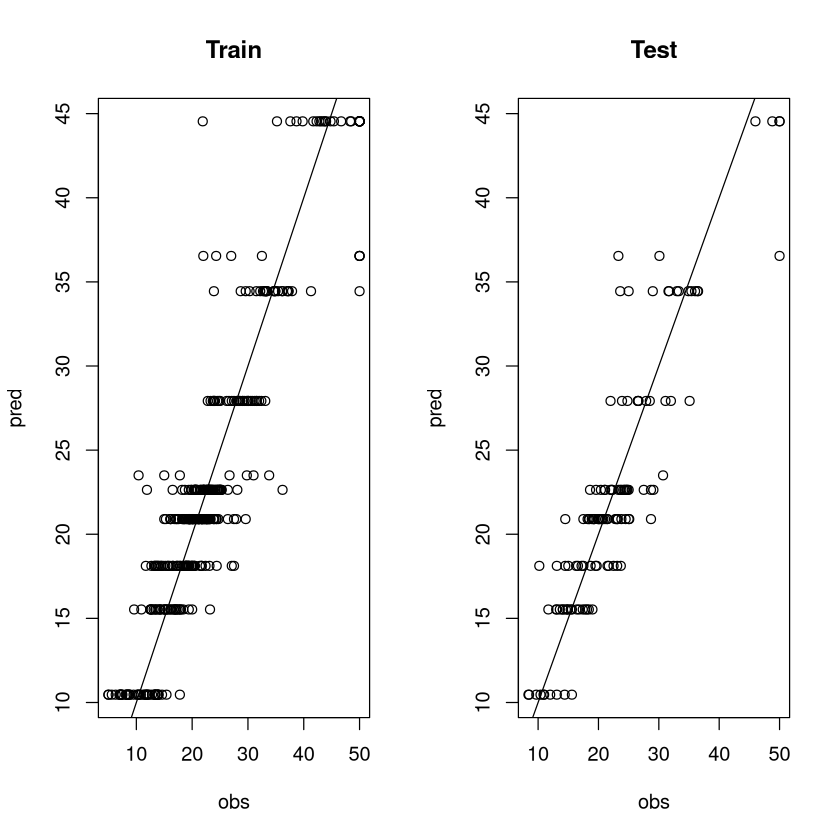

In [21]:
## optimum tree (in terms of 'maxdepth', according to 'caret')
pred.train.t.opt.md = predict(t.opt.md, newdata = Boston[indtrain, ])
pred.test.t.opt.md = predict(t.opt.md, newdata = Boston[indtest, ])

rmse.train.t.opt.md = rmse(Boston[indtrain, ]$medv, pred.train.t.opt.md)
rmse.test.t.opt.md = rmse(Boston[indtest, ]$medv, pred.test.t.opt.md)

c(rmse.train.t.opt.md, rmse.test.t.opt.md)
c(var(pred.train.t.opt.md)/var(Boston[indtrain, ]$medv), 
  var(pred.test.t.opt.md)/var(Boston[indtest, ]$medv))

par(mfrow = c(1, 2))
plot(Boston[indtrain, ]$medv, pred.train.t.opt.md, 
     xlab = "obs", ylab = "pred", main = "Train")
abline(0,1)
plot(Boston[indtest, ]$medv, pred.test.t.opt.md,
    xlab = "obs", ylab = "pred", main = "Test")
abline(0,1)

# Obtención de predicciones continuas: El paquete `Cubist`

Una de las principales limitaciones de los CART en problemas de regresión es que, por construcción, la varianza de las predicciones es muy baja (como máximo, podremos llegar a tener tantos valores predichos distintos como hojas tenga el árbol con el que estemos trabajando). Para paliar esta limitación se introducen los árboles de regresión de tipo M5 y Cubist, que ajustan un modelo de regresión lineal dentro de cada hoja, lo que les permite producir predicciones continuas con una varianza más parecida a la de las observaciones. En `caret`, el método `Cubist` implementa este tipo de árboles.

**Ejercicio**: Siguiendo el mismo marco de validación cruzada que has utilizado en los ejemplos anteriores, entrena un árbol de tipo `Cubist` con `caret`. Utiliza los parámetros por defecto del método `Cubist`.

In [22]:
if (!require(Cubist)) install.packages("Cubist")

t.cubist = train(medv ~ ., Boston, subset = indtrain, 
                 method = "cubist",
                 trControl = trctrl)

Loading required package: Cubist



**Ejercicio**: Aplica el método `summary` al objeto devuelto por `train`. Verás que, dependiendo de la complejidad del árbol, el resultado puede llegar a ser muy verboso, ya que proporciona los coeficientes del modelo de regresión ajustado en cada hoja. Tómate un tiempo para familiarizarte con esta información. 

In [23]:
#summary(t.cubist)

**Ejercicio:** Utiliza el árbol que acabas de ajustar mediante el método `Cubist` para predecir en el test. Compara estas predicciones con las que obtuviste para árboles tipo CART (por ejemplo, para el árbol por defecto que ajustaste con `tree` y para el óptimo al que llegaste con `caret`). ¿Qué conclusiones obtienes?

[1] 2.501018
[1] 1.042624


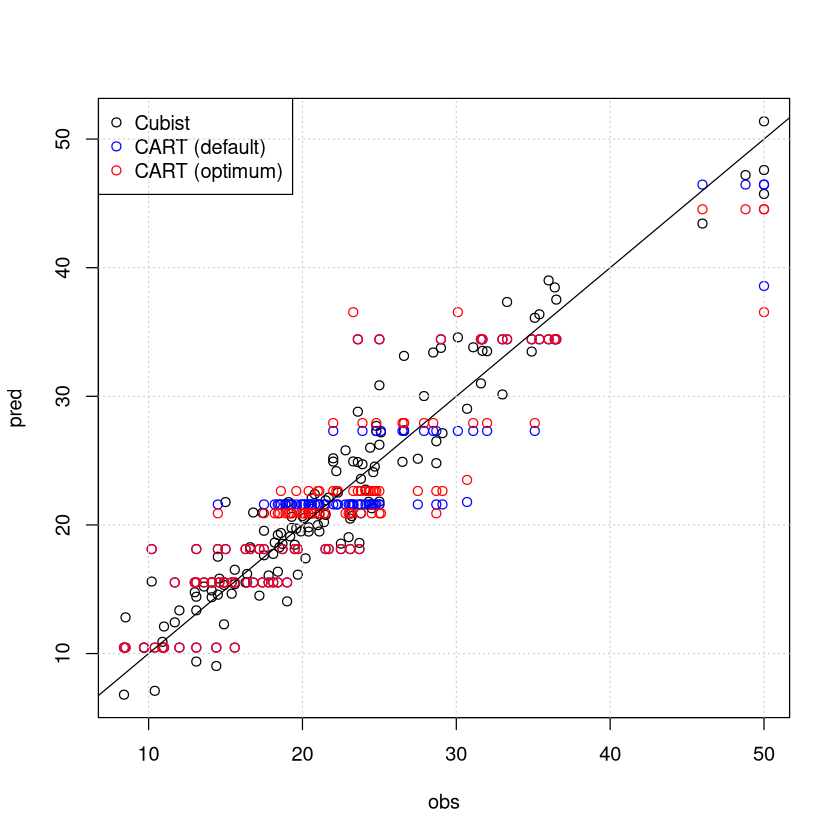

In [24]:
## predictions for test (for the Cubist tree)
pred.test.t.cubist = predict(t.cubist, Boston[indtest, ])
rmse.test.t.cubist = rmse(Boston[indtest, ]$medv, pred.test.t.cubist)
print(rmse.test.t.cubist)
print(var(pred.test.t.cubist)/var(Boston[indtest, ]$medv))

## comparison between CART and Cubist
plot(Boston[indtest, ]$medv, pred.test.t.cubist, xlab = "obs", ylab = "pred")
points(Boston[indtest, ]$medv, pred.test.t.default, col = "blue")
points(Boston[indtest, ]$medv, pred.test.t.opt.md, col = "red")
abline(0, 1)
legend("topleft", c("Cubist", "CART (default)", "CART (optimum)"), 
       pch = 21, col = c("black", "blue", "red"))
grid()

### Nota sobre el uso de `tree` vs. `rpart`

Tanto `tree` como `rpart` son implementaciones alternativas en `R` para el ajuste de árboles de decisión. Si bien ambos paquetes sirven para el mismo propósito, conviene tener en cuenta que `rpart` es una implementación en lenguaje `C` de los procesos más costosos computacionalmente (por ejemplo el _prunning_), por lo que es más rápida para determinadas tareas.

A continuación se muestra una tabla que recoge los parámetros principales con los que hemos trabajado en cada caso. Ten en cuenta que, aún afectando a aspectos similares en la construcción del árbol, no hay una equivalencia directa, parámetro a parámetro, entre los dos paquetes. Es necesario consultar cuidadosamente la ayuda para entender correctamente la finalidad de cada uno de ellos.

| Parámetro/aspecto        |  `tree.control`  |  `rpart`  | 
|--------------------------|------------------|-----------|
| Tamaño mínimo de nodo permitido | `minsize`  | `minsplit` |
| Número mínimo de observaciones por nodo hijo | `mincut` | `minbucket` |             
| Parámetro de coste-complejidad ($\alpha$) | `k` (en función `prune.tree`)  | `cp` |
| Profundidad máxima del árbol | no indicado  | `maxdepth` |
| Varianza mínima intra-nodal para proseguir la partición | `mindev` | no indicado |

Por último, ten en cuenta que en el caso de la función `tree`, estos parámetros pueden pasársele directamente como argumentos de entrada o a través de una lista construída con la función `tree.control`. En `rpart`, por contra, siempre son argumentos de entrada.